In [9]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
print('Setup Complete')

Setup Complete


In [10]:
mhd_filepath = 'mhd_data.csv'
mhd_data = pd.read_csv(mhd_filepath, index_col='index')
mhd_data

/var/folders/1d/p4k_zvrn1sz1_3r604v23y3h0000gn/T/ipykernel_7117/3290729724.py:2: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  mhd_data = pd.read_csv(mhd_filepath, index_col='index')


,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
index,,,,,,,,,,
0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...
108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing

In [11]:
# Check Datatypes
mhd_data.dtypes

Entity                        object
Code                          object
Year                          object
Schizophrenia (%)             object
Bipolar disorder (%)          object
Eating disorders (%)          object
Anxiety disorders (%)        float64
Drug use disorders (%)       float64
Depression (%)               float64
Alcohol use disorders (%)    float64
dtype: object

In [12]:
# Creating a copy of the dataframe
mhd_data_copy = mhd_data.copy(deep=True)

# Here are some formulas that I made that I think I will use multiple times

In [46]:
# Checking for percentage of values in the columns of the dataframe that are NaN
def nan_percentage(df):
    num1 = df.isnull().sum()
    num2 = len(df)
    percentage = (num1 / num2) * 100
    result_df = pd.DataFrame({
        'Column': num1.index,
        'Percentage of NaN': percentage.values
    })
    return result_df

In [50]:
# Checking how many unique values there are
def unique_count(df, column):
    unique_values = len(df[column].unique())
    return f'Number of unique values within {column} column: {unique_values}'

In [51]:
def range_of_unique_counts(df, column):
    entity_count = df[column].value_counts()
    min_count = entity_count.min()
    max_count = entity_count.max()
    rng = max_count - min_count
    return f'Range within {column} column: {rng}'

# Issue with dataset
The dataset I had downloaded from kaggle contained 4 separate datasets combined into one. Below is the steps I took to separate one of them. I then repeated the process 2 more times to finish separating the datasets.

In [53]:
# Above didn't work because dataset has 4 tables in one so I need to create 4 csv files
# I need to find the row index to use as a split point
row_index = mhd_data_copy.loc[mhd_data_copy['Schizophrenia (%)'] == 'Prevalence in males (%)'].index
row_index

Index([6468], dtype='int64', name='index')

In [40]:
# From above I know the split point is 6468
split_point = 6468
segment_names = ['mhd_percentages_in_areas', 'mhd_gender_prevalence']
segments = [mhd_data_copy.iloc[i:j] for i, j in zip([0] + [split_point], [split_point] + [None])]
for i, segment in enumerate(segments, 1):
    segment_name = segment_names[i-1]
    segment.to_csv(f'{segment_name}.csv', index=False)


At this point I noticed the headings for the combined csv were moved over to the mhd_gender csv so I went onto the csv and deleted the row so that the right column headings were in place and so that I would not get unnecessary NaN values.

In [171]:
# I have to create new dataframes for both tables
mhd_areas = pd.read_csv('mhd_percentages_in_areas.csv')
mhd_gender = pd.read_csv('mhd_gender_prevalence.csv')

In [180]:
print(nan_percentage(mhd_areas))
print(unique_count(mhd_areas, 'Entity'))
print(range_of_unique_counts(mhd_areas, 'Entity'))

                      Column  Percentage of NaN
0                     Entity           0.000000
1                       Code          15.151515
2                       Year           0.000000
3          Schizophrenia (%)           0.000000
4       Bipolar disorder (%)           0.000000
5       Eating disorders (%)           0.000000
6      Anxiety disorders (%)           0.000000
7     Drug use disorders (%)           0.000000
8             Depression (%)           0.000000
9  Alcohol use disorders (%)           0.000000
Number of unique values within Entity column: 231
Range within Entity column: 0


In [184]:
mhd_gender.dtypes

Entity                        object
Code                          object
Year                           int64
Prevalence in males (%)      float64
Prevalence in females (%)    float64
Population                   float64
dtype: object

In [205]:
mhd_gender = mhd_gender.dropna(subset=['Prevalence in males (%)', 'Population'])

In [206]:
# Datatypes in mhd_gender need to be changed
mhd_gender['Year'] = mhd_gender['Year'].astype(int)
mhd_gender['Prevalence in males (%)'] = mhd_gender['Prevalence in males (%)'].astype(float)
mhd_gender['Prevalence in females (%)'] = mhd_gender['Prevalence in females (%)'].astype(float)
mhd_gender['Population'] = mhd_gender['Population'].astype(float)

In [207]:
mhd_gender.head()


,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
190,Afghanistan,AFG,1990,3.499982,4.647815,12412000.0
191,Afghanistan,AFG,1991,3.503947,4.655772,13299000.0
192,Afghanistan,AFG,1992,3.508912,4.662066,14486000.0
193,Afghanistan,AFG,1993,3.513429,4.669012,15817000.0
194,Afghanistan,AFG,1994,3.515578,4.673050,17076000.0


In [177]:
mhd_suicide_rate = pd.read_csv('mhd_suicide_rate.csv')
mhd_suicide_rate

,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population
0,Afghanistan,AFG,1800,NaN,NaN,3280000.0
1,Afghanistan,AFG,1801,NaN,NaN,3280000.0
2,Afghanistan,AFG,1802,NaN,NaN,3280000.0
3,Afghanistan,AFG,1803,NaN,NaN,3280000.0
4,Afghanistan,AFG,1804,NaN,NaN,3280000.0
...,...,...,...,...,...,...
47802,Zimbabwe,ZWE,2015,27.197061,3068.250731,13815000.0
47803,Zimbabwe,ZWE,2016,26.839591,3081.782858,14030000.0
47804,Zimbabwe,ZWE,2017,26.391769,3094.795065,14237000.0
47805,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0


Because suicide_rate table has 86% NaN values in 2 columns I am going to drop all the NaN columns and check how many unique entities there are.

In [190]:
mhd_suicide_rate = mhd_suicide_rate.dropna(subset=['Depressive disorder rates (number suffering per 100,000)', 'Population'])
print(nan_percentage(mhd_suicide_rate))
print(unique_count(mhd_suicide_rate, 'Entity'))
print(range_of_unique_counts(mhd_suicide_rate, 'Entity'))

                                              Column  Percentage of NaN
0                                             Entity           0.000000
1                                               Code           1.010101
2                                               Year           0.000000
3      Suicide rate (deaths per 100,000 individuals)           0.000000
4  Depressive disorder rates (number suffering pe...           0.000000
5                                         Population           0.000000
Number of unique values within Entity column: 198
Range within Entity column: 0


Based on this I think I can still use this dataframe. Each entity has an equal number of rows with no NaN values that could affect me.

In [233]:
mhd_depression = pd.read_csv('mhd_depression.csv')
nan_percentage(mhd_depression)

,Column,Percentage of NaN
0,Entity,0.000000
1,Code,15.151515
2,Year,0.000000
3,Prevalence - Depressive disorders - Sex: Both ...,0.000000


mhd_depression only has NaN values in Code. I don't need to use the area code as I have the area name as Entity

# Data Visualization

### mhd_percentages_in_areas csv

In [192]:
# I want to see which country had the highest percentage of those with Mental Health Disorders
columns_to_add = ['Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)']
mhd_areas['Total Percentage of Population (%)'] = mhd_areas[columns_to_add].sum(axis=1)
mhd_areas.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Total Percentage of Population (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404,12.210341
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768,12.223371
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644,12.239378
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738,12.254742
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260,12.265264


In [193]:
# I want to check for a specific area such as Afghanistan
# I will create a new dataframe
mhd_areas_afg = mhd_areas[mhd_areas['Entity'] == 'Afghanistan']

In [194]:
# Importing both matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
mhd_areas_afg.columns

Index(['Entity', 'Code', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
       'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)',
       'Total Percentage of Population (%)'],
      dtype='object')

In [196]:
# Sorting the dataframe by year ascending
mhd_areas_afg = mhd_areas_afg.sort_values(by=['Year'], ascending=True)
mhd_areas_afg.tail()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Total Percentage of Population (%)
23,Afghanistan,AFG,2013,0.165579,0.706471,0.101291,4.869701,2.572396,4.134661,0.662433,13.212532
24,Afghanistan,AFG,2014,0.165742,0.706876,0.103137,4.872256,2.562885,4.133526,0.662447,13.206869
25,Afghanistan,AFG,2015,0.165895,0.707275,0.104445,4.875201,2.543144,4.135419,0.662276,13.193655
26,Afghanistan,AFG,2016,0.166035,0.707686,0.105808,4.878875,2.513553,4.135694,0.661850,13.169501
27,Afghanistan,AFG,2017,0.166158,0.708089,0.107142,4.882481,2.473934,4.136347,0.661217,13.135368


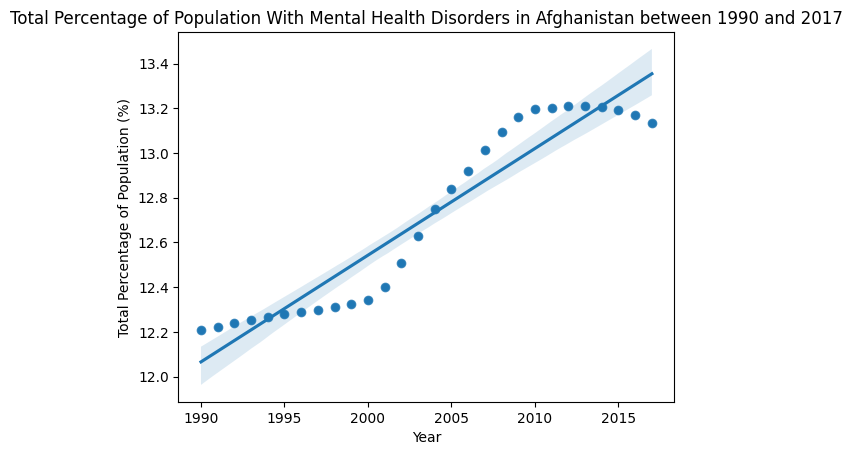

In [197]:
# Getting a scatterplot plot of Area vs Disorders to see which area has the most
sns.scatterplot(x=mhd_areas_afg['Year'], y=mhd_areas_afg['Total Percentage of Population (%)'])
sns.regplot(x=mhd_areas_afg['Year'], y=mhd_areas_afg['Total Percentage of Population (%)'])
plt.title('Total Percentage of Population With Mental Health Disorders in Afghanistan between 1990 and 2017')
plt.show()

In [198]:
# Getting a dataframe for just the UK
mhd_areas_uk = mhd_areas[mhd_areas['Entity'] == 'United Kingdom']
mhd_areas_uk = mhd_areas_uk.sort_values(by=['Year'], ascending=True)
mhd_areas_uk.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Total Percentage of Population (%)
6048,United Kingdom,GBR,1990,0.249251,1.085660,0.449857,4.569683,1.469056,4.264897,1.411711,13.500115
6049,United Kingdom,GBR,1991,0.249386,1.086215,0.452755,4.578463,1.498285,4.255942,1.438431,13.559477
6050,United Kingdom,GBR,1992,0.249538,1.086838,0.456267,4.586816,1.526338,4.248149,1.463424,13.617370
6051,United Kingdom,GBR,1993,0.249694,1.087485,0.460031,4.594153,1.551576,4.241936,1.486110,13.670985
6052,United Kingdom,GBR,1994,0.249846,1.088124,0.464176,4.599920,1.573221,4.237369,1.506031,13.718687


In [199]:
mhd_areas_uk.columns

Index(['Entity', 'Code', 'Year', 'Schizophrenia (%)', 'Bipolar disorder (%)',
       'Eating disorders (%)', 'Anxiety disorders (%)',
       'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)',
       'Total Percentage of Population (%)'],
      dtype='object')

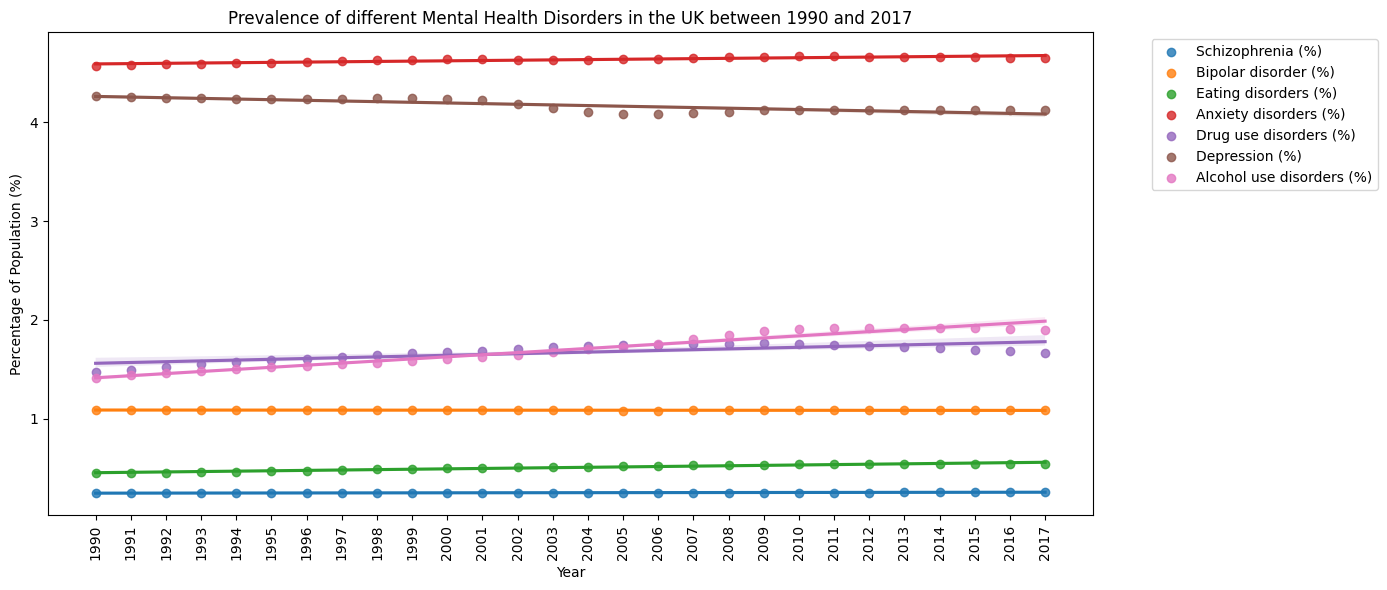

In [200]:
# Creating a regression line plot of separate mental health disorders for the UK between 1990 and 2017
columns_to_plot = ['Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)',  'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)',  'Alcohol use disorders (%)']

plt.figure(figsize=(14, 6))

for column in columns_to_plot:
    sns.regplot(x=mhd_areas_uk['Year'], y=mhd_areas_uk[column], label=column)

plt.ylabel('Percentage of Population (%)')
plt.xticks(mhd_areas_uk['Year'], rotation=90)
plt.title('Prevalence of different Mental Health Disorders in the UK between 1990 and 2017')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [208]:
# Creating a dataframe of 10 random countries and comparing their values for Drug use disorders (%) in 2017.
mhd_areas_drug_use_2017 = mhd_areas[mhd_areas['Year'] == 2017].dropna(subset=['Drug use disorders (%)']).sort_values(by='Drug use disorders (%)', ascending=True)
mhd_drug_use_comparison = mhd_areas_drug_use_2017.sample(n=10)
mhd_drug_use_comparison = mhd_drug_use_comparison.sort_values(by=['Entity'], ascending=True)
mhd_drug_use_comparison

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%),Total Percentage of Population (%)
615,Benin,BEN,2017,0.170322,0.640206,0.120290,2.905294,0.505541,3.629899,0.988584,8.960136
643,Bermuda,BMU,2017,0.221154,0.974986,0.491449,4.692816,0.853379,2.826293,1.506917,11.566994
1147,"Central Europe, Eastern Europe, and Central Asia",NaN,2017,0.197898,0.686838,0.205557,2.983414,0.718708,3.243674,3.500378,11.536467
1455,Croatia,HRV,2017,0.207565,0.720556,0.217975,3.447606,0.713971,2.779842,2.080532,10.168047
5039,Singapore,SGP,2017,0.274090,0.730592,0.553712,3.730467,0.914669,3.438271,0.491369,10.133170
5291,Southeast Asia,NaN,2017,0.231524,0.541305,0.145650,3.164195,0.643613,2.807239,0.917453,8.450979
5487,Sudan,SDN,2017,0.176167,0.747536,0.147025,4.899048,1.408446,3.781451,0.645813,11.805486
5739,Thailand,THA,2017,0.234879,0.543035,0.173202,3.329594,0.846268,3.085057,0.912775,9.124810
6355,Western Sub-Saharan Africa,NaN,2017,0.175340,0.637776,0.142431,2.908183,0.488562,3.699654,0.968598,9.020544
6439,Zambia,ZMB,2017,0.165866,0.605972,0.142768,3.599714,0.515972,3.641811,1.633243,10.305346


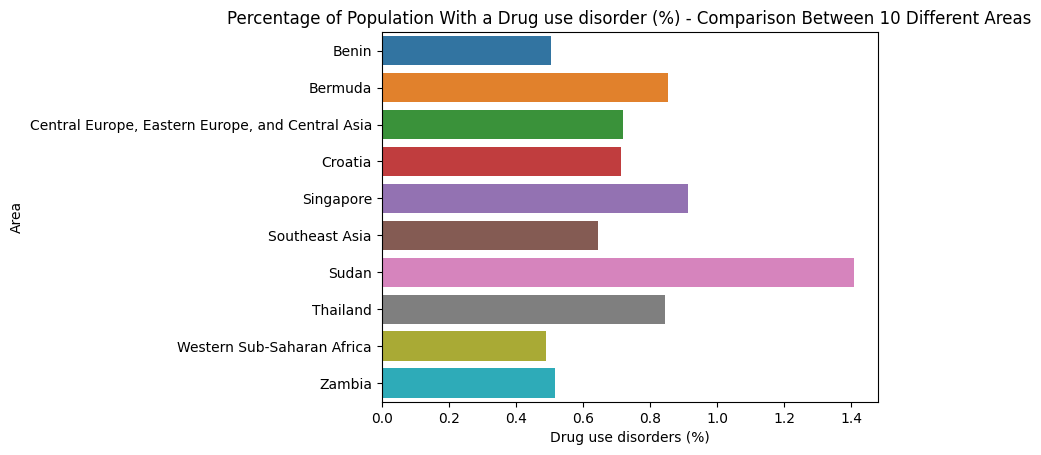

In [209]:
# Creating a bar graph for the information above for the countries in alphabetical order
sns.barplot(data=mhd_drug_use_comparison, x='Drug use disorders (%)', y='Entity', orient='h')
plt.title('Percentage of Population With a Drug use disorder (%) - Comparison Between 10 Different Areas')
plt.ylabel('Area')
plt.xlabel('Drug use disorders (%)')
plt.show()

### mhd_gender csv

In [210]:
# I used the below lines of code to create 10 random countries to use as a sample and a variable to use when plotting graphs or charts. The random_state is so that I can choose what sequence of random entities to use. I did this so I could compare the separate graphs for Males and Females

unique_entities = mhd_gender['Entity'].unique()
sampled_entities = pd.Series(unique_entities).sample(n=10, random_state=21)
sampled_entities

143                       Qatar
9                     Australia
17                      Belgium
20                      Bermuda
45                       Cyprus
6           Antigua and Barbuda
52                      Ecuador
91                     Kiribati
129    Northern Mariana Islands
181                      Turkey
dtype: object

In [211]:
nan_percentage(mhd_gender)

,Column,Percentage of NaN
0,Entity,0.000000
1,Code,1.010101
2,Year,0.000000
3,Prevalence in males (%),0.000000
4,Prevalence in females (%),0.000000
5,Population,0.000000


In [213]:
# Creating a graph to show the difference in prevalence in Mental Health Disorders for females in 10 random entities between 1990 and 2017
# For females
mhd_gender_w = mhd_gender.drop(['Prevalence in males (%)'], axis=1)
mhd_gender_w_sampled = mhd_gender_w[mhd_gender_w['Entity'].isin(sampled_entities)]
mhd_gender_w_sampled = mhd_gender_w_sampled[(mhd_gender_w_sampled['Year'] >= 1990) & (mhd_gender_w_sampled['Year'] <= 2017)]

In [214]:
nan_percentage(mhd_gender_w_sampled)

,Column,Percentage of NaN
0,Entity,0.0
1,Code,0.0
2,Year,0.0
3,Prevalence in females (%),0.0
4,Population,0.0


In [215]:
mhd_gender_w_sampled.dtypes

Entity                        object
Code                          object
Year                           int64
Prevalence in females (%)    float64
Population                   float64
dtype: object

At this point I was running into datatype and NaN errors. I went back over my code and added to where I had to dropna or change datatypes.

I could have cleaned the data better but I didn't want to drop all NaN values at the beginning before seeing what issues I would see when working with them.

In [216]:
print(nan_percentage(mhd_gender_w_sampled))
print(unique_count(mhd_gender_w_sampled, 'Entity'))
print(range_of_unique_counts(mhd_gender_w_sampled, 'Entity'))
print(mhd_gender_w_sampled['Entity'].unique())

                      Column  Percentage of NaN
0                     Entity                0.0
1                       Code                0.0
2                       Year                0.0
3  Prevalence in females (%)                0.0
4                 Population                0.0
Number of unique values within Entity column: 10
Range within Entity column: 0
['Antigua and Barbuda' 'Australia' 'Belgium' 'Bermuda' 'Cyprus' 'Ecuador'
 'Kiribati' 'Northern Mariana Islands' 'Qatar' 'Turkey']


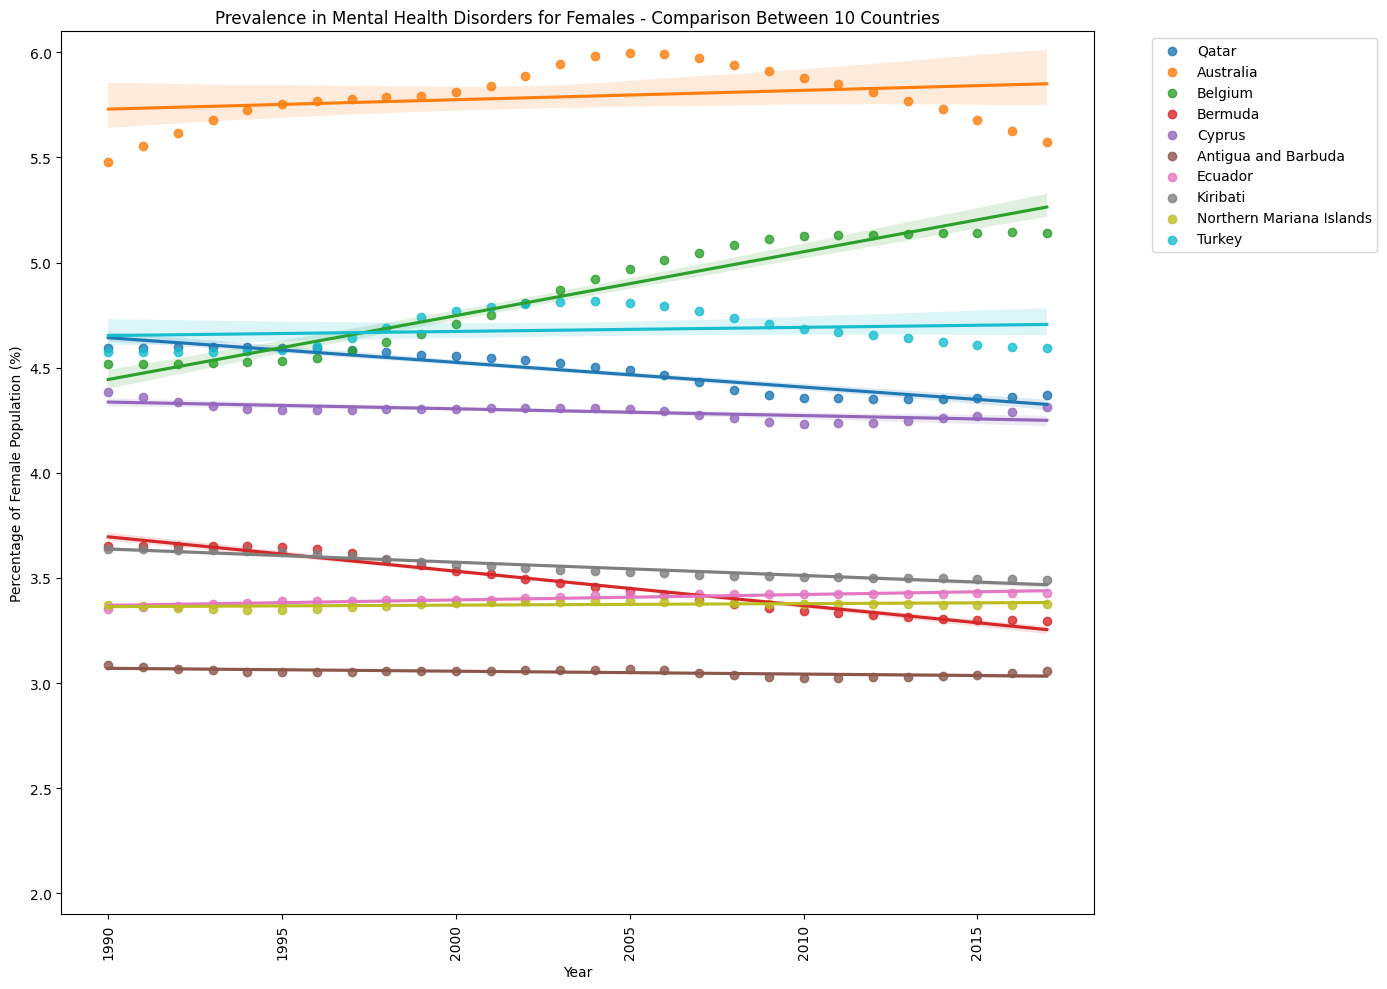

In [231]:
plt.figure(figsize=(14, 10))

for entity in sampled_entities:
    entity_data = mhd_gender_w_sampled[mhd_gender_w_sampled['Entity'] == entity]
    sns.regplot(x='Year', y='Prevalence in females (%)', data=entity_data, label=entity)

plt.ylabel('Percentage of Female Population (%)')
# I set the minimum and maximum values for the y axis below. This was to enable an easier comparison between both the male and female graphs
plt.ylim(1.9, 6.1)
plt.xticks(rotation=90)
plt.title('Prevalence in Mental Health Disorders for Females - Comparison Between 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [218]:
# Creating a graph to show the difference in prevalence in Mental Health Disorders for males in the same 10 entities
mhd_gender_m = mhd_gender.drop(['Prevalence in females (%)'], axis=1)
mhd_gender_m_sampled = mhd_gender_m[mhd_gender_m['Entity'].isin(sampled_entities)]
mhd_gender_m_sampled = mhd_gender_m_sampled[(mhd_gender_m_sampled['Year'] >= 1990) & (mhd_gender_m_sampled['Year'] <= 2017)]

In [219]:
print(nan_percentage(mhd_gender_m_sampled))
print(unique_count(mhd_gender_m_sampled, 'Entity'))
print(range_of_unique_counts(mhd_gender_m_sampled, 'Entity'))
print(mhd_gender_m_sampled['Entity'].unique())

                    Column  Percentage of NaN
0                   Entity                0.0
1                     Code                0.0
2                     Year                0.0
3  Prevalence in males (%)                0.0
4               Population                0.0
Number of unique values within Entity column: 10
Range within Entity column: 0
['Antigua and Barbuda' 'Australia' 'Belgium' 'Bermuda' 'Cyprus' 'Ecuador'
 'Kiribati' 'Northern Mariana Islands' 'Qatar' 'Turkey']


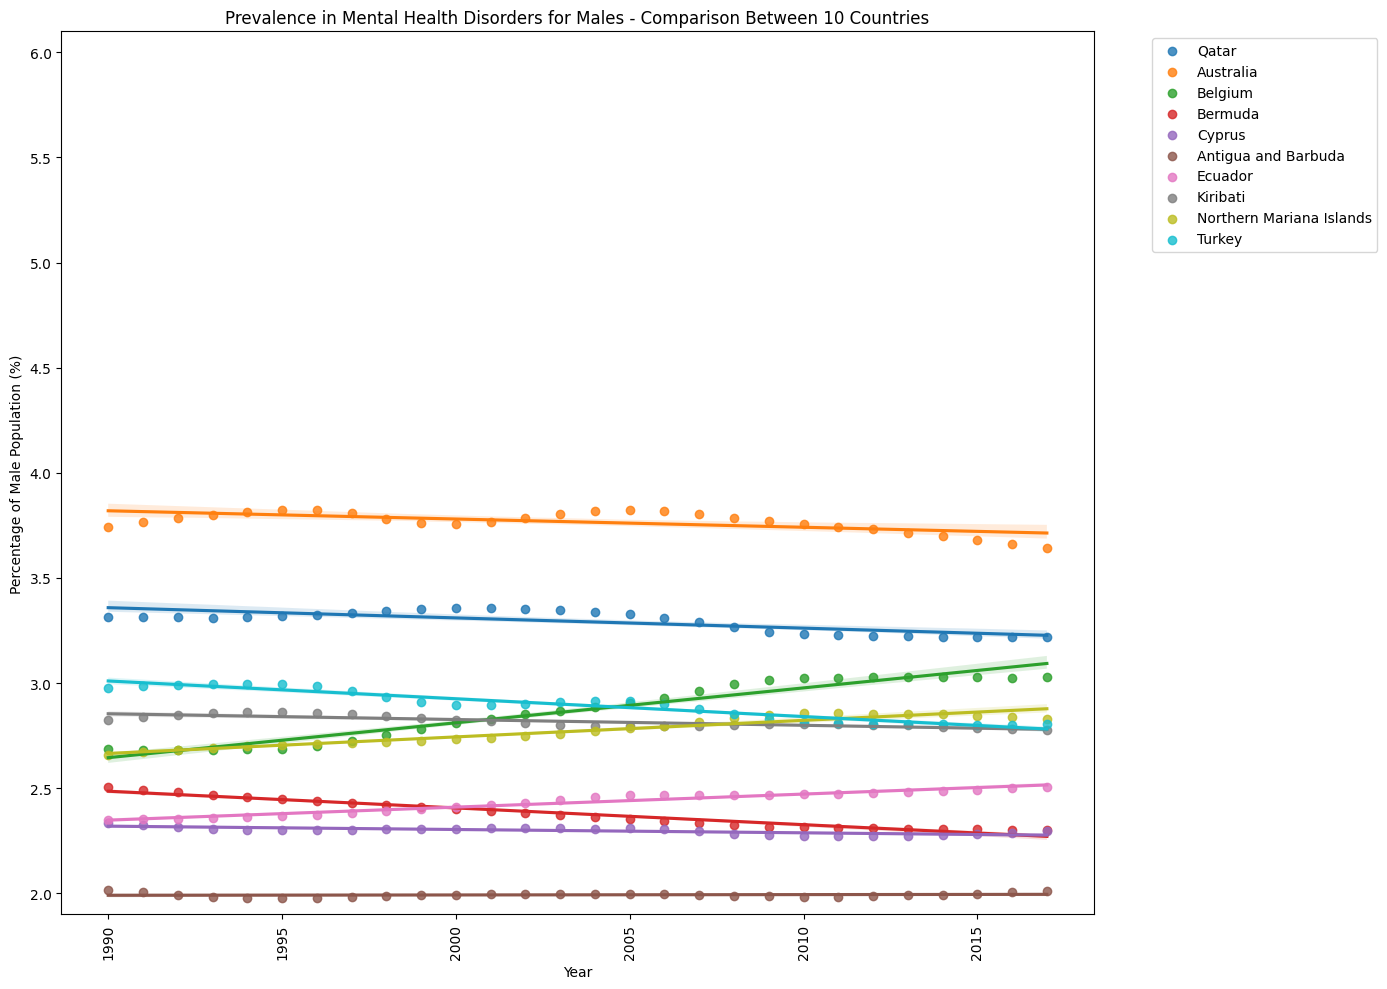

In [232]:
plt.figure(figsize=(14, 10))

for entity in sampled_entities:
    entity_data = mhd_gender_m_sampled[mhd_gender_m_sampled['Entity'] == entity]
    sns.regplot(x='Year', y='Prevalence in males (%)', data=entity_data, label=entity)

plt.ylabel('Percentage of Male Population (%)')
plt.ylim(1.9, 6.1)
plt.xticks(rotation=90)
plt.title('Prevalence in Mental Health Disorders for Males - Comparison Between 10 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [244]:
# Boxplot for data for both males and females in the UK

mhd_gender_uk = mhd_gender[mhd_gender['Entity'] == 'United Kingdom']
mhd_gender_uk

,Entity,Code,Year,Prevalence in males (%),Prevalence in females (%),Population
45132,United Kingdom,GBR,1990,3.394946,5.075136,57134000.0
45133,United Kingdom,GBR,1991,3.398248,5.054095,57291000.0
45134,United Kingdom,GBR,1992,3.401414,5.035474,57446000.0
45135,United Kingdom,GBR,1993,3.403783,5.020768,57602000.0
45136,United Kingdom,GBR,1994,3.405444,5.010073,57763000.0
45137,United Kingdom,GBR,1995,3.405915,5.004516,57932000.0
45138,United Kingdom,GBR,1996,3.406501,5.004993,58114000.0
45139,United Kingdom,GBR,1997,3.407422,5.010061,58307000.0
45140,United Kingdom,GBR,1998,3.408111,5.015508,58510000.0
45141,United Kingdom,GBR,1999,3.407452,5.019656,58716000.0


[]

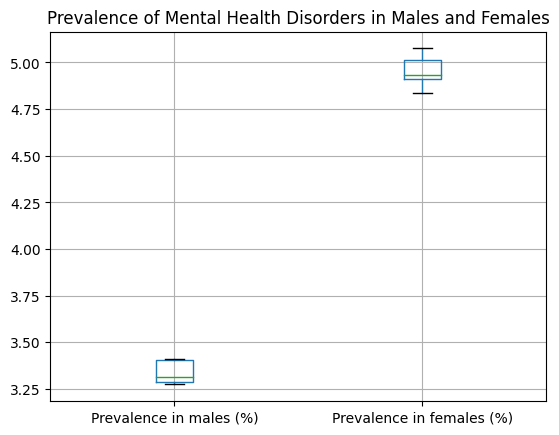

In [257]:
# Boxplot code
b_plot = mhd_gender_uk.boxplot(column=['Prevalence in males (%)', 'Prevalence in females (%)'])
plt.title('Prevalence of Mental Health Disorders in Males and Females')
b_plot.plot()

### mhd_depression csv

In [308]:
mhd_depression.dtypes

Entity                                                                                                        object
Code                                                                                                          object
Year                                                                                                           int64
Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)    float64
dtype: object

In [304]:
mhd_depression_copy = mhd_depression.copy()

In [305]:
mhd_depression_thailand = mhd_depression_copy[mhd_depression_copy['Entity'] == 'Thailand']
mhd_depression_thailand

,Entity,Code,Year,Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)
5712,Thailand,THA,1990,1527226.018
5713,Thailand,THA,1991,1573827.563
5714,Thailand,THA,1992,1617064.120
5715,Thailand,THA,1993,1659601.283
5716,Thailand,THA,1994,1700093.308
5717,Thailand,THA,1995,1737967.965
5718,Thailand,THA,1996,1774308.103
5719,Thailand,THA,1997,1811219.463
5720,Thailand,THA,1998,1846006.511
5721,Thailand,THA,1999,1881524.040


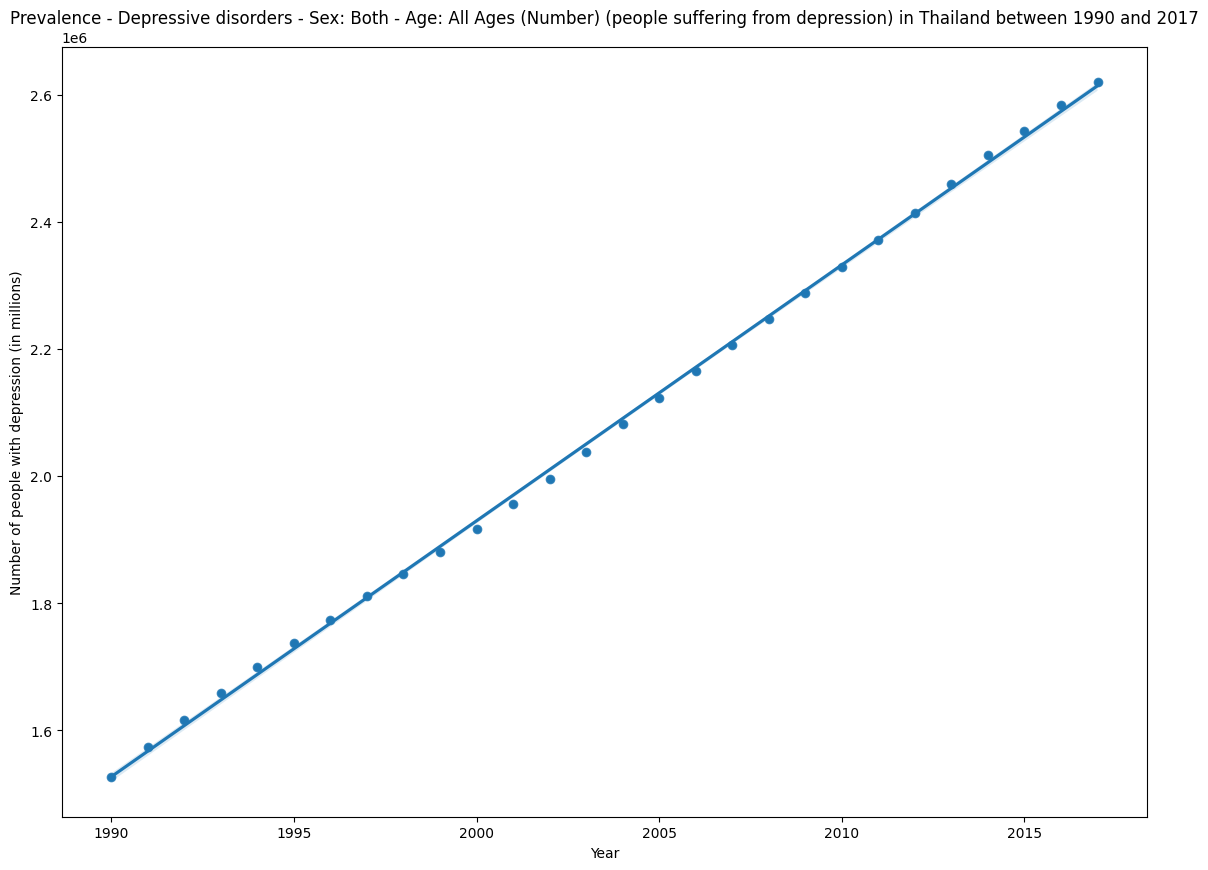

In [306]:
# Getting a scatterplot plot of Area vs Disorders to see which area has the most
plt.figure(figsize=(14, 10))

sns.scatterplot(x=mhd_depression_thailand['Year'], y=mhd_depression_thailand['Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)'])
sns.regplot(x=mhd_depression_thailand['Year'], y=mhd_depression_thailand['Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression)'])
plt.ylabel('Number of people with depression (in millions)')
plt.title('Prevalence - Depressive disorders - Sex: Both - Age: All Ages (Number) (people suffering from depression) in Thailand between 1990 and 2017')
plt.show()

### mhd_suicide_rate csv

In [309]:
mhd_suicide_rate.dtypes

Entity                                                       object
Code                                                         object
Year                                                         object
Suicide rate (deaths per 100,000 individuals)               float64
Depressive disorder rates (number suffering per 100,000)    float64
Population                                                  float64
dtype: object

In [310]:
# Convert year to int
mhd_suicide_rate['Year'] = mhd_suicide_rate['Year'].astype(int)

In [311]:
nan_percentage(mhd_suicide_rate)

,Column,Percentage of NaN
0,Entity,0.000000
1,Code,1.010101
2,Year,0.000000
3,"Suicide rate (deaths per 100,000 individuals)",0.000000
4,Depressive disorder rates (number suffering pe...,0.000000
5,Population,0.000000


I won't be manipulating the data any further so I won't create a copy.

I want to show correlation between Depressive disorder rates (number suffering per 100,000) and Suicide rate (deaths per 100,000 individuals) so I think another scatter or line graph is good for this.

In [320]:
# I want a specific year so I will use 2017. I will also use my sample of 10 areas like before
mhd_suicide_rate_2017 = mhd_suicide_rate[mhd_suicide_rate['Year'] == 2017]
mhd_suicide_rate_sample_2017 = mhd_suicide_rate_2017[mhd_suicide_rate_2017['Entity'].isin(sampled_entities)]
mhd_suicide_rate_sample_2017

,Entity,Code,Year,"Suicide rate (deaths per 100,000 individuals)","Depressive disorder rates (number suffering per 100,000)",Population
1607,Antigua and Barbuda,ATG,2017,2.650124,2451.162951,95000.0
2487,Australia,AUS,2017,11.046885,4137.162467,24585000.0
4247,Belgium,BEL,2017,14.275319,3735.792160,11420000.0
4757,Bermuda,BMU,2017,3.428443,2659.142580,63000.0
10845,Cyprus,CYP,2017,4.630150,3080.221678,1180000.0
12469,Ecuador,ECU,2017,9.213645,2842.366317,16785000.0
21721,Kiribati,KIR,2017,26.378631,3120.534752,114000.0
31203,Northern Mariana Islands,MNP,2017,12.157769,2959.239836,57000.0
34255,Qatar,QAT,2017,4.639951,3283.810855,2725000.0
43769,Turkey,TUR,2017,3.310770,3497.303000,81116000.0


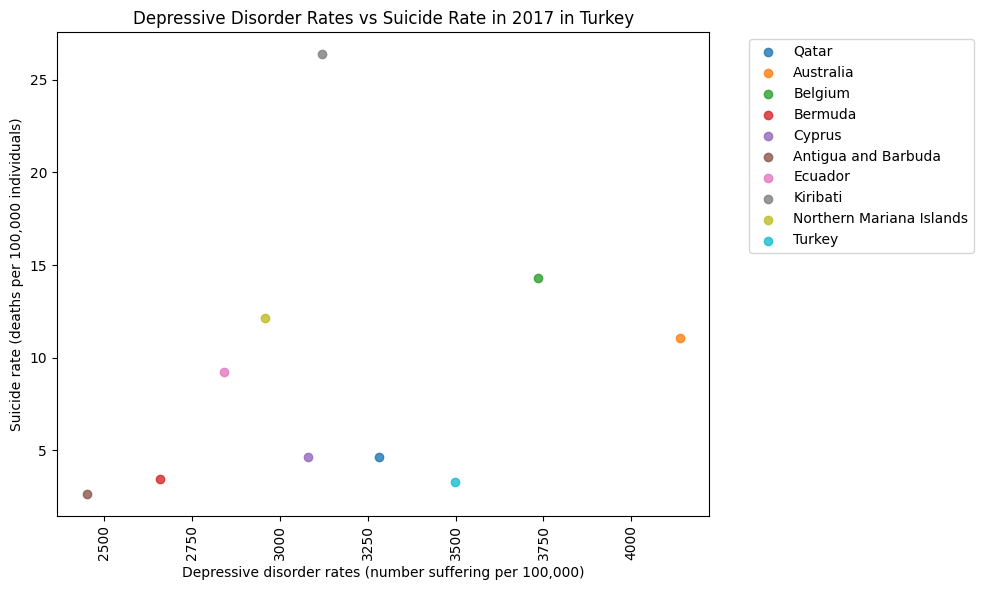

In [321]:
plt.figure(figsize=(10, 6))

for entity in sampled_entities:
    entity_data = mhd_suicide_rate_sample_2017[mhd_suicide_rate_sample_2017['Entity'] == entity]
    sns.regplot(x='Depressive disorder rates (number suffering per 100,000)', y='Suicide rate (deaths per 100,000 individuals)', data=entity_data, label=entity)

plt.xticks(rotation=90)
plt.title('Depressive Disorder Rates vs Suicide Rate in 2017 in Turkey')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

From this we can see the correlation between Depressive disorder rates and suicide rates in these areas.

# Dashboard

In [323]:
# Importing necessary libraries
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import plotly.express as px